In [0]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

print(play_game(Strategie.CHANGER))
print(play_game(Strategie.CHANGER))
print(play_game(Strategie.CHANGER))
print(play_game(Strategie.CHANGER))
print(play_game(Strategie.CHANGER))
print(play_game(Strategie.CHANGER))

True
False
True
True
False
False


En changeant de porte, le joueur a gagné 6606 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3366 sur 10000 parties.


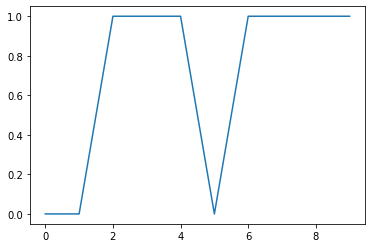

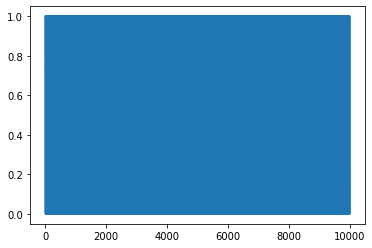

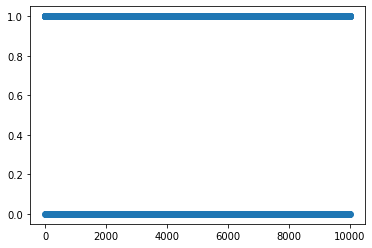

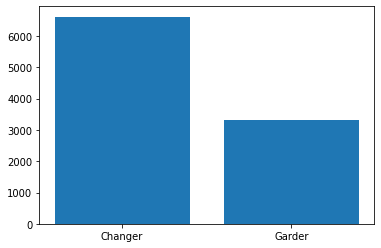

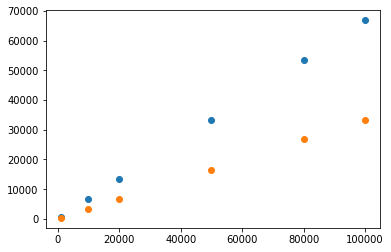

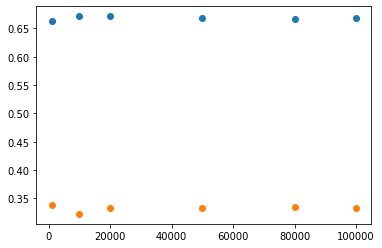

In [0]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
    # le cours "Apprenez à programmer en Python" sur OpenClassrooms
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

# plot renvoie un objet, que l'on pourra manipuler plus tard pour
# personnaliser le graphique
figure = plt.figure()
plot = plt.plot(play(Strategie.CHANGER, 10))

#dommage pour les lignes
figure = plt.figure()
plot = plt.plot(play(Strategie.CHANGER, 10000))

#les points sont trop gros (ms c'est plus pertinent)
figure = plt.figure()
plot = plt.scatter(range(10000), play(Strategie.CHANGER, 10000))

figure = plt.figure()
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)), 
             sum(play(Strategie.GARDER, 10000))], 
       tick_label=["Changer","Garder"])

gains_changer = []
gains_garder = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])

figure = plt.figure()
plot = plt.scatter(samples,[(sum(x)/len(x)) for x in gains_changer])
plot = plt.scatter(samples,[(sum(x)/len(x)) for x in gains_garder])

In [0]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed, choice

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    AUPIF = 3
    
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie

    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    elif strategie == Strategie.AUPIF: 
        deuxieme_choix = choice((portes[0], premier_choix))
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
    # le cours "Apprenez à programmer en Python" sur OpenClassrooms
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

print("Au pif, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.AUPIF, 10000))))

figure = plt.figure()
plot = plt.bar([1,2,3],[sum(play(Strategie.CHANGER, 10000)), 
             sum(play(Strategie.GARDER, 10000)),  sum(play(Strategie.AUPIF, 10000))], 
       tick_label=["Changer","Garder", "Au pif"])

gains_changer = []
gains_garder = []
gains_aupif = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))
    gains_aupif.append(play(Strategie.AUPIF, tours))

figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])
plot = plt.scatter(samples, [sum(x) for x in gains_aupif])

figure = plt.figure()
plot = plt.scatter(samples,[(sum(x)/len(x)) for x in gains_changer])
plot = plt.scatter(samples,[(sum(x)/len(x)) for x in gains_garder])
plot = plt.scatter(samples,[(sum(x)/len(x)) for x in gains_aupif])

La moyenne empirique de notre distribution est 5000.125387551509.
La moyenne empirique de la variable généré par la fonction rand est 0.49954754519637623.
La variance empirique de notre distribution est 831.3617445555511.
La variance empirique de la variable généré par la fonction rand est 0.08380784943334114.


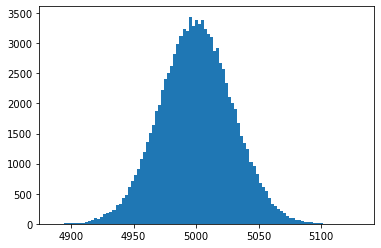

In [0]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt

matrice_aleatoire = np.random.rand(10000,100000)
sommes = np.sum(matrice_aleatoire,0)
plot = plt.hist(sommes, bins=100)

print("La moyenne empirique de notre distribution est {}."
      .format(np.mean(sommes)))
print("La moyenne empirique de la variable généré par la fonction rand est {}."
      .format(np.mean(np.random.rand(100000))))
print("La variance empirique de notre distribution est {}."
      .format(np.var(sommes)))
print("La variance empirique de la variable généré par la fonction rand est {}."
      .format(np.var(np.random.rand(100000))))

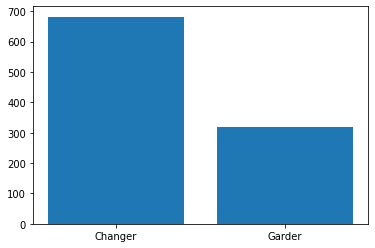

In [0]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import monty_hall

taille = 1000
changement = np.zeros((taille,), dtype=int)
sanschangement = np.zeros((taille,), dtype=int)

changement , sanschangement = monty_hall.calc_monty_hall(taille)

plot = plt.bar([1,2],[sum(changement), sum(sanschangement)],tick_label=["Changer", "Garder"])



PENSER A FAIRE DE TPS EN TPS UN CTR+M
L'environnement d'exec peut rester instable sinon !



In [0]:
import numpy as np

np.array([1,4,2,5,3], dtype='float32')

# Une liste de listes est transformée en un tableau multi-dimensionnel
matrix = np.array([range(i, i + 3) for i in [2, 4, 6]]) 

print(matrix)

# Un tableau de longueur 10, rempli d'entiers qui valent 0
print(np.zeros(10, dtype=int))

# Un tableau de taille 3x5 rempli de nombres à virgule flottante de valeur 1
print(np.ones((3, 5), dtype=float))

# Un tableau 3x5 rempli de 3,14
print(np.full((3, 5), 3.14))

# Un tableau rempli d'une séquence linéaire
# commençant à 0 et qui se termine à 20, avec un pas de 2
print(np.arange(0, 20, 2))

# Un tableau de 5 valeurs, espacées uniformément entre 0 et 1
print(np.linspace(0, 1, 5))

# Celle-ci vous la conaissez déjà! Essayez aussi "randint" et "normal"
print(np.random.random((3, 3)))

# La matrice identité de taille 3x3 
# (matrice identité : https://fr.wikipedia.org/wiki/Matrice_identit%C3%A9)
print(np.eye(3))

np.random.seed(0)
x1 = np.random.randint(10, size=6)  # Tableau de dimension 1
print("nombre de dimensions de x1: ", x1.ndim)
print("forme de x1: ", x1.shape)
print("taille de x1: ", x1.size)
print("type de x1: ", x1.dtype)
print(x1)

# Pour accéder au premier élément
print(x1[0])

# Pour accéder au dernier élément
print(x1[-1])

x2 = np.random.randint(10, size=(3, 4))  # Tableau de dimension 2
print(x2[0,1])

# On peut aussi modifier les valeurs
x1[1] = "1000"
print(x1)

# Attention au type
x1[1] = 3.14
print(x1)

print(x1[:5])  # Les cinq premiers éléments

print(x1[5:])  # Les éléments à partir de l'index 5

print(x1[::2])  # Un élément sur deux

[[2 3 4]
 [4 5 6]
 [6 7 8]]
[0 0 0 0 0 0 0 0 0 0]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14]]
[ 0  2  4  6  8 10 12 14 16 18]
[0.   0.25 0.5  0.75 1.  ]
[[0.47997717 0.3927848  0.83607876]
 [0.33739616 0.64817187 0.36824154]
 [0.95715516 0.14035078 0.87008726]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
nombre de dimensions de x1:  1
forme de x1:  (6,)
taille de x1:  6
type de x1:  int64
[5 0 3 3 7 9]
5
9
5
[   5 1000    3    3    7    9]
[5 3 3 3 7 9]
[5 3 3 3 7]
[9]
[5 3 7]


In [0]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

print(np.vstack([x, grid]))
x = np.array([[1],[2]])
print(np.hstack([x, grid]))

[[1 2 3]
 [9 8 7]
 [6 5 4]]
[[1 9 8 7]
 [2 6 5 4]]


In [0]:
import numpy as np

def calcul_inverse(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
print(calcul_inverse(values))

tableau_large = np.random.randint(1, 100, size=1000000)

# Ceci est une facilité des notebooks jupyter pour 
# mesurer le temps d'exécution d'une instruction
%timeit calcul_inverse(tableau_large)

#calcule 1/nbr pour ttes les valeurs du tableau via numpy
print("et pour la version numpy")
%timeit (1.0 / tableau_large)

x = [-2, -1, 1, 2]
print("La valeur absolue: ", np.abs(x))
print("Exponentielle: ", np.exp(x))
print("Logarithme: ", np.log(np.abs(x)))

x = np.random.rand(3,3)
print(x > 0.5) #applique la condition a chaque element
print(np.where(x > 0.5)) #affiche la liste des indexs ou la condition est vraie

%timeit sum(tableau_large)
%timeit np.sum(tableau_large)

[0.2        0.11111111 0.11111111 0.125      0.14285714]
1 loop, best of 3: 2.5 s per loop
et pour la version numpy
100 loops, best of 3: 2.87 ms per loop
La valeur absolue:  [2 1 1 2]
Exponentielle:  [0.13533528 0.36787944 2.71828183 7.3890561 ]
Logarithme:  [0.69314718 0.         0.         0.69314718]
[[ True False  True]
 [False False  True]
 [ True  True False]]
(array([0, 0, 1, 2, 2]), array([0, 2, 2, 0, 1]))
10 loops, best of 3: 164 ms per loop
1000 loops, best of 3: 663 µs per loop


In [0]:
import numpy as np

#rajouter 5 a un tableau
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
print(a + b)
%timeit a + b

#ou sinon 
print(a + 5)
%timeit a + 5

M = np.ones((3, 3))
print("M vaut: \n", M)
print("M+a vaut: \n", M+a)

a = np.arange(3)
# La ligne suivante crée une matrice de taille 3x1
# avec trois lignes et une colonne.
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)
print(a+b)

[5 6 7]
The slowest run took 22.17 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 558 ns per loop
[5 6 7]
The slowest run took 11.32 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 905 ns per loop
M vaut: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
M+a vaut: 
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
[0 1 2]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast']


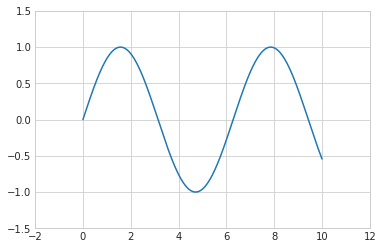

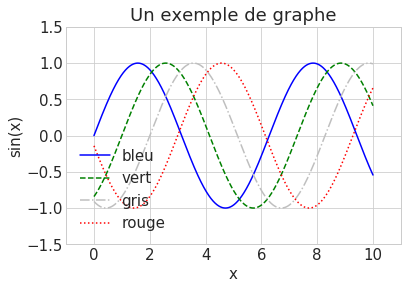

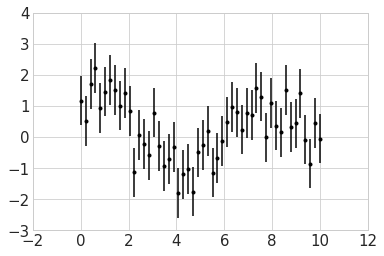

<Figure size 432x288 with 0 Axes>

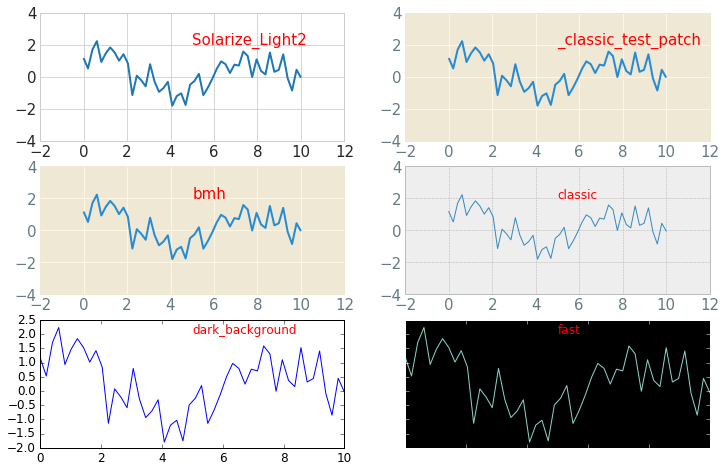

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

# Chanegr la taille de police par défaut
plt.rcParams.update({'font.size': 15})

fig = plt.figure()
ax = plt.axes()
# Couleur spécifiée par son nom, ligne solide
plt.plot(x, np.sin(x - 0), color='blue', linestyle='solid', label='bleu')
# Nom court pour la couleur, ligne avec des traits
plt.plot(x, np.sin(x - 1), color='g', linestyle='dashed', label='vert')
# Valeur de gris entre 0 et 1, des traits et des points
plt.plot(x, np.sin(x - 2), color='0.75', linestyle='dashdot', label='gris')
# Couleur spécifié en RGB, avec des points
plt.plot(x, np.sin(x - 3), color='#FF0000', linestyle='dotted', label='rouge')

# Les limites des axes, essayez aussi les arguments 'tight' et 'equal' 
# pour voir leur effet
plt.axis([-1, 11, -1.5, 1.5]);

# Les labels
plt.title("Un exemple de graphe")

# La légende est générée à partir de l'argument label de la fonctio
# plot. L'argument loc spécifie le placement de la légende
plt.legend(loc='lower left');

# Titres des axes
ax = ax.set(xlabel='x', ylabel='sin(x)')

fig = plt.figure()
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

fig = plt.figure()

print(plt.style.available[:6])

# Notez la taille de la figure
fig = plt.figure(figsize=(12,8))
for i in range(6):
    # On peut ajouter des sous graphes ainsi
    fig.add_subplot(3,2,i+1)
    plt.style.use(plt.style.available[i])
    plt.plot(x, y)
    
    # Pour ajouter du texte
    plt.text(s=plt.style.available[i], x=5, y=2, color='red')

notebook matplotlib

https://nbviewer.jupyter.org/urls/gist.githubusercontent.com/Jwink3101/e6b57eba3beca4b05ec146d9e38fc839/raw/f486ca3dcad44c33fc4e7ddedc1f83b82c02b492/Matplotlib_Cheatsheet

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


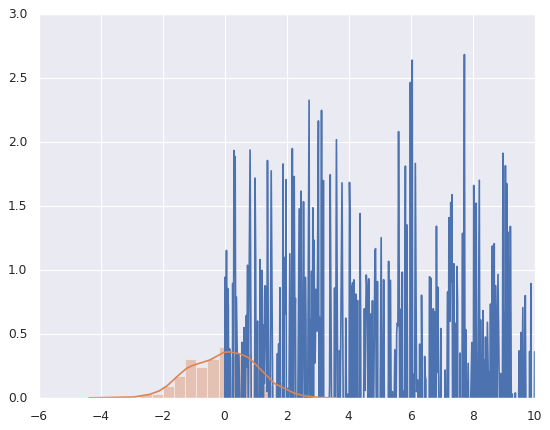

In [0]:
import seaborn as sns
sns.set()

x = np.linspace(0, 10, 500)
y = np.random.randn(500)
plt.plot(x,y)


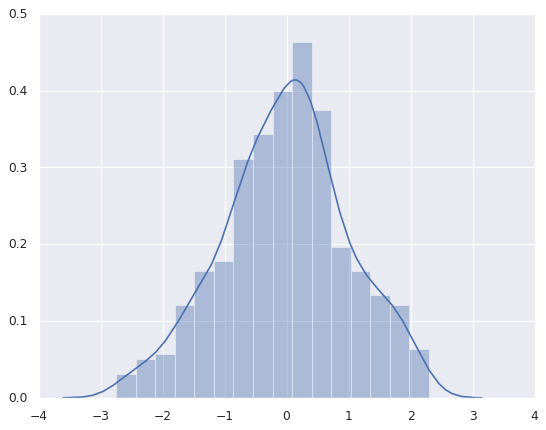

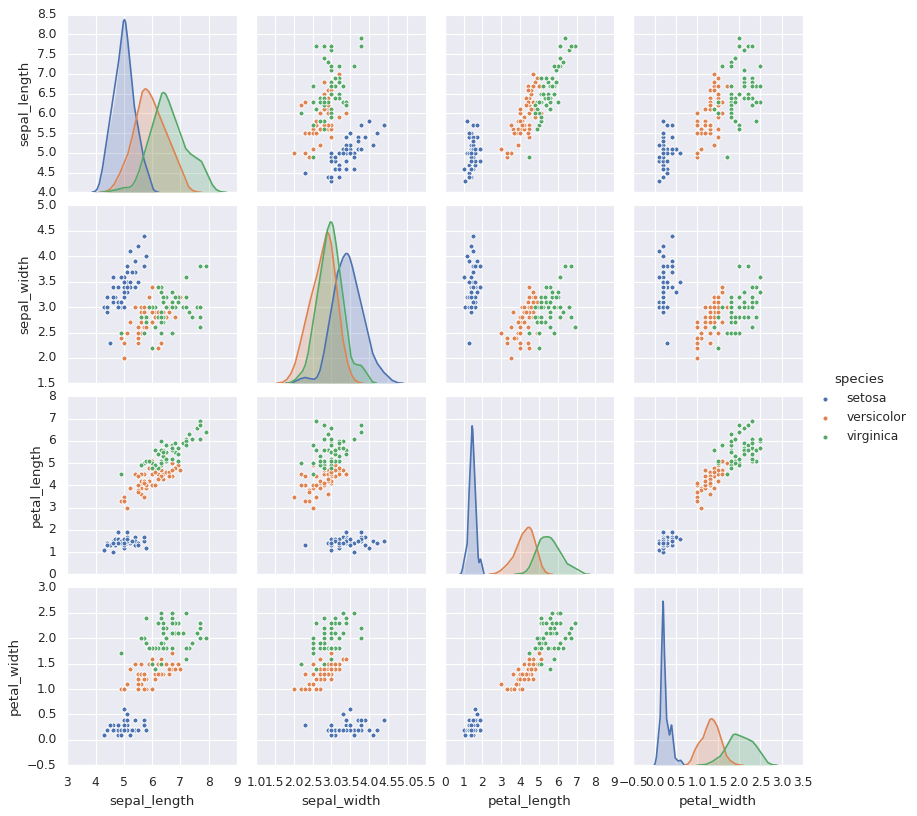

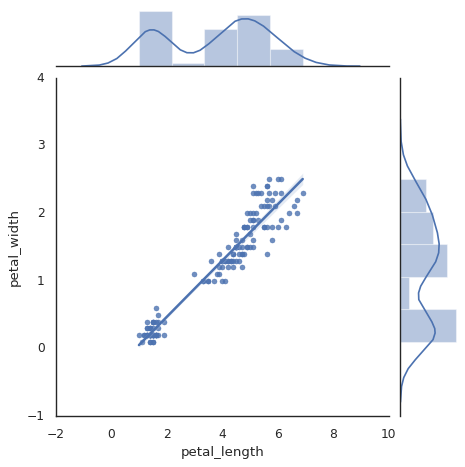

In [0]:
import seaborn as sns
sns.set()

x = np.linspace(0, 10, 500)
y = np.random.randn(500)
sns.distplot(y, kde=True);

iris = sns.load_dataset("iris")
iris.head()

sns.pairplot(iris, hue='species', height=2.5);

with sns.axes_style('white'):
    sns.jointplot("petal_length", "petal_width", data=iris, kind='reg')

Pour la doc seaborn : 
https://seaborn.pydata.org

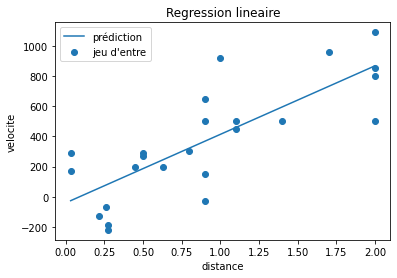

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

data = pd.read_csv("hubble_data.csv")

distance = data.distance.values.reshape(-1,1)
velocity = data.recession_velocity

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(distance, velocity)

plt.figure()
plt.title("Regression lineaire")
plt.scatter(distance, velocity, label="jeu d'entre")
plt.plot(distance, regr.predict(distance),  label="prédiction")
plt.xlabel("distance")
plt.ylabel("velocite")
plt.legend()
plt.show()

PARTIE PANDA

In [0]:
import numpy as np
#representer des familles de pandas via des tableaux
un_panda_numpy = np.array([100,5,20,80])

famille_panda = [
    np.array([100, 5  , 20, 80]), # maman panda
    np.array([50 , 2.5, 10, 40]), # bébé panda
    np.array([110, 6  , 22, 80]), # papa panda
]

famille_panda = [
    [100, 5  , 20, 80], # maman panda
    [50 , 2.5, 10, 40], # bébé panda
    [110, 6  , 22, 80], # papa panda
]

famille_panda_numpy = np.array(famille_panda)


In [9]:
import pandas as pd
import numpy as np
#en utilisant panda

famille_panda = [
    [100, 5  , 20, 80], # maman panda
    [50 , 2.5, 10, 40], # bébé panda
    [110, 6  , 22, 80], # papa panda
]

famille_panda_df = pd.DataFrame(famille_panda)
print(famille_panda_df)

#comme panda utilise numpy
famille_panda_numpy = np.array(famille_panda)
famille_panda_df = pd.DataFrame(famille_panda_numpy,
                                index = ['maman', 'bebe', 'papa'],
                                columns = ['pattes', 'poil', 'queue', 'ventre'])
print(famille_panda_df)

#meme effet
famille_panda_df.ventre
famille_panda_df["ventre"]
#pour avoir une valeur exploitable par numpy
famille_panda_df["ventre"].values

for ind_ligne, contenu_ligne in famille_panda_df.iterrows():
    print("Voici le panda %s :" % ind_ligne)
    print(contenu_ligne)
    print("--------------------")

famille_panda_df.iloc[2] # Avec iloc(), indexation positionnelle
famille_panda_df.loc["papa"] # Avec loc(), indexation par label

#select sur les pandas qui ont un ventre de taille 80
print(famille_panda_df["ventre"] == 80)

#pour faire un where sur ces pandas :
masque = famille_panda_df["ventre"] == 80
pandas_80 = famille_panda_df[masque]

# On écrit plus souvent cela de cette manière :
# pandas_80 = famille_panda_df[famille_panda_df["ventre"] == 80]

print(pandas_80)

#inversion du masque 
pandas_80 = famille_panda_df[~masque]
print(pandas_80)

quelques_pandas = pd.DataFrame([[105,4,19,80],[100,5,20,80]],      # deux nouveaux pandas
                               columns = famille_panda_df.columns) 
                               # même colonnes que famille_panda_df
tous_les_pandas = famille_panda_df.append(quelques_pandas)

#pour virer les doublons : 
pandas_uniques = tous_les_pandas.drop_duplicates()

# accéder aux noms des colonnes
famille_panda_df.columns

# créer une nouvelle colonne, composée de chaînes de caractères
famille_panda_df["sexe"] = ["f", "f", "m"] 
# la maman et le bébé sont des femelles, le papa est un mâle

# obtenir le nombre de lignes
len(famille_panda_df)

     0    1   2   3
0  100  5.0  20  80
1   50  2.5  10  40
2  110  6.0  22  80
       pattes  poil  queue  ventre
maman   100.0   5.0   20.0    80.0
bebe     50.0   2.5   10.0    40.0
papa    110.0   6.0   22.0    80.0
Voici le panda maman :
pattes    100.0
poil        5.0
queue      20.0
ventre     80.0
Name: maman, dtype: float64
--------------------
Voici le panda bebe :
pattes    50.0
poil       2.5
queue     10.0
ventre    40.0
Name: bebe, dtype: float64
--------------------
Voici le panda papa :
pattes    110.0
poil        6.0
queue      22.0
ventre     80.0
Name: papa, dtype: float64
--------------------
maman     True
bebe     False
papa      True
Name: ventre, dtype: bool
       pattes  poil  queue  ventre
maman   100.0   5.0   20.0    80.0
papa    110.0   6.0   22.0    80.0
      pattes  poil  queue  ventre
bebe    50.0   2.5   10.0    40.0


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

#apercu
print(titanic.head())

#affichage de l'ensemble des valeurs d'une colone sans doublon
print(titanic.age.unique())

#stats diverses sur la structure de donnée
print(titanic.describe(include="all"))

#met un age de 0 sur les 10 1eres ligne pour un age qui valait NaN
titanic.fillna(value={"age": 0}).age.head(10)

#remplacer par la valeur précedente
titanic.fillna(method="pad").age.head(10)

#supprime les lignes contenant des NaN, peut supprimer colonne aussi
titanic.dropna().head(10)
titanic.dropna(axis="columns").head()

#renommer les colonnes 
titanic.rename(columns={"sex":"sexe"})

#applique la fonction  f  à tous les index. 
f = lambda x: x+1
titanic.rename(index=f)

titanic.drop(0) #suppr la 1ere ligne
titanic.drop(columns=["age"]) ##suppr la colonne age

#tableau croise dynamique pour voir la repartition des survivants selon le sexe et la classe
titanic.pivot_table('survived', index='sex', columns='class')

#pour avoir autre chose qu'une moyenne (ici le nbr de survivants)
titanic.pivot_table('survived', index='sex', columns='class', aggfunc="sum")

#dataframe multi indexe entre mineurs et majeurs
titanic.dropna(inplace=True)
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
          surviv

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.500000
       (18, 80]  0.968254  0.875000  0.666667
male   (0, 18]   0.800000  1.000000  1.000000
       (18, 80]  0.397436  0.333333  0.250000

ALGEBRE RELATIONNEL

In [22]:
import numpy as np
import pandas as pd

# On peut créer une Series à partir d'une list
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print("data ressemble à un tableau Numpy: ", data)

# On peut spécifier des indices à la main
data = pd.Series([0.25, 0.5, 0.75, 1.0],
         index=['a', 'b', 'c', 'd'])
print("data ressemble à un dict en Python: ", data)
print(data['b'])

# On peut même créer une Serie directement à partir d'une dict
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
area_dict = {'California': 423967, 
             'Texas': 695662,
             'New York': 141297, 
             'Florida': 170312,
             'Illinois': 149995}
population = pd.Series(population_dict)
area = pd.Series(area_dict)
print(population)
#affiche de california a florida
print(population['California':'Florida'])

#pour construire un dataframe :
# A partir d'une Series
df = pd.DataFrame(population, columns=['population'])
print(df)

# A partir d'une list de dict
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
df = pd.DataFrame(data)
print(df)

# A partir de plusieurs Series
df = pd.DataFrame({'population': population,
              'area': area})
print(df)

# A partir d'un tableau Numpy de dimension 2
df = pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])
print(df)

# Une fonction pour générer facilement des DataFrame. 
# Elle nous sera utile dans la suite de ce chapitre.
def make_df(cols, ind):
    """Crée rapidement des DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# exemple
make_df('ABC', range(3))

data ressemble à un tableau Numpy:  0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
data ressemble à un dict en Python:  a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64


In [38]:
import numpy as np
import pandas as pd

data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])

print(data)

#SELECT
# On peut désigner un élément d'une Series par son index
print(data.loc['b'])

# Ou bien par sa position
print(data.iloc[1])

# On peut même créer une Serie directement à partir d'une dict
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
area_dict = {'California': 423967, 
             'Texas': 695662,
             'New York': 141297, 
             'Florida': 170312,
             'Illinois': 149995}

data = pd.DataFrame({'area':area, 'pop':population})
print(data)

data.loc[:'Illinois', :'pop']

#UNION

ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

def make_df(cols, ind):
    """Crée rapidement des DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # Rend les index identiques
# Nous avons alors des index dupliqués
print(pd.concat([x, y]))

# Nous pouvons spécifier des index hiérarchiques
hdf = pd.concat([x, y], keys=['x', 'y'])
print(hdf)

hdf.loc[('x', 1),]

#JOINTURE
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'department': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'date': [2004, 2008, 2012, 2014]})
df3 = pd.merge(df1, df2) 
#ici la colonne employee a le meme nom, ms si le snoms etaient differents
df3 = pd.merge(df1, df2, left_on= "employee", right_on= "employee")

#exemple de la cardinalité n to n
df5 = pd.DataFrame({'department': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'competence': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
pd.merge(df1, df5)

#jointure externe sur lisa
df6 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'Lea'],
                    'department': ['Accounting', 'Engineering', 'Engineering', 'HR', 'Engineering']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'date': [2004, 2008, 2012, 2014]})
pd.merge(df6, df2, how="left") #left pke df6 est le 1er argument et qu'on vout voir Lisa
#une jointure externe totale (droite et gauche) se fait avec how=outer

#produit carthésien
# Nous ajoutons une nouvelle colonne à df1 et df2, qui contient toujours
# la même valeur, ici 0.
df1['key'] = 0
df2['key'] = 0

# La jointure plusieurs-à-plusieurs
produit_cartesien = pd.merge(df1, df2, on='key')

# Effaçons la colonne key qui n'est plus utile
produit_cartesien.drop('key',1, inplace=True)
#faisable a une seule ligne : pd.merge(df1.assign(key=0), df2.assign(key=0), on='key').drop('key', axis=1)
print(pd.merge(df1.assign(key=0), df2.assign(key=0), on='key').drop('key', axis=1))

#fonctions
rng = np.random.RandomState(42)

# Une Series avec cinq nombres aléatoires
ser = pd.Series(rng.rand(5))
print(ser.sum()) #somme
print(ser.mean())#moyenne

df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
                   
# Par colonne
print(df.mean())

# Par ligne
print(df.mean(axis='columns'))

##GROUPBY
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': [10,11,10,9,10,10]})                  
print(df)

gb = df.groupby('key')

print(gb.sum())
print(gb.mean())

s = gb['data1','data2'].sum()
m = gb['data2',].mean()

groupped = pd.concat([s,m], axis=1)
groupped.columns = ["data1_somme","data2_somme","data2_moyenne"]

#equivaut a 
#SELECT sum(data1) as data1_somme, sum(data2) as data2_somme, mean(data2) as data2_moyenne FROM df GROUP BY 'key';

#on peut aussi utiliser des requetes SQL dans panda ! 
#https://datatofish.com/sql-to-pandas-dataframe/

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5
0.5
              area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3
   employee_x   department employee_y  date
0         Bob   Accounting       Lisa  2004
1         Bob   Accounting        Bob  2008
2         Bob   Accounting       Jake  2012
3         Bob   Accounting        Sue  2014
4        Jake  Engineering       Lisa  2004
5        Jake  Engineering        Bob  2008
6        Jake  Engineering       Jake  2012
7        Jake  Engineering        Sue  2014
8        Lisa  Engineering       Lisa  2004
9        Lisa  Engineering        Bob  2008
10       Lisa  Engineering       Jake  2012
11       Lisa  Engineering        Sue  2014
12        Sue           HR       Lisa  2004
13        Sue           HR        Bob

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:127: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [158]:
#Dernier TP
import numpy as np
import pandas as pd
import seaborn as sns

datafull = pd.read_csv("births.csv")

print(datafull.describe())

filtreAnnee = datafull["year"]<1990
#on ne garde que les 60's, 70's, 80's
data = datafull.where(filtreAnnee) #met a NaN tout ce qui ne correspond pas au filtre
data = data.dropna() #supprime les lignes à NaN

#au moins un mois a un jour a 99 !
filtreJour = data["day"]<32
data = data.where(filtreJour) #met a NaN tout ce qui ne correspond pas au filtre
data = data.dropna() #supprime les lignes à NaN

#vu sur la correction par abandon...
#en fait les donnees contiennent des dates ou le jour depasse le maximum autorise par le mois et fais crasher tout le reste !
data = data.query('(births > 1000) & (births < 100000)')

data['decade'] = 10 * (data['year'] // 10)

#somme des naissances selon les sexes par date, avec une table qui contient desormais les champs du groupe et la somme
data = data.groupby(["year", "month", "day"])['births'].sum().reset_index()

for dateAgg in ["year", "month", "day"]:
  data[dateAgg] = data[dateAgg].astype(int)

data.index = pd.to_datetime(10000 * data.year.astype(int) + 100 * data.month.astype(int) + data.day.astype(int), format="%Y%m%d" )

data["jourSemaine"] = data.index.dayofweek

commande = data.groupby(["jourSemaine"])['births'].sum().reset_index()

#nbr de cartes à commander par jour de la semaine
print(commande)

               year         month           day         births
count  15547.000000  15547.000000  15067.000000   15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561
std        6.728340      3.449632     15.284034   28552.465810
min     1969.000000      1.000000      1.000000       1.000000
25%     1974.000000      4.000000      8.000000    4358.000000
50%     1979.000000      7.000000     16.000000    4814.000000
75%     1984.000000     10.000000     24.000000    5289.500000
max     2008.000000     12.000000     99.000000  199622.000000
   jourSemaine      births
0            0  10371795.0
1            1  10813799.0
2            2  10533386.0
3            3  10434806.0
4            4  10593230.0
5            5   9091504.0
6            6   8646988.0
